# **Breast Cancer diagnostic**

explore the Breast Cancer Winsconsin diagnostic dataset, which is made of 596 instances of 30 input features obtained from real cell measurements (radius, mean of distances from center to points on the perimeter, texture, perimeter, area, smoothness, compactness, concavity, symmetry, etc). The goal is to predict whether each instance is a tumor cell or a normal cell.

https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset

In [36]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC as svc
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as knearest
from sklearn.linear_model import LogisticRegression as logreg

(array([ 19.,  79., 185., 129.,  55.,  50.,  38.,   7.,   4.,   3.]),
 array([ 6.981 ,  9.0939, 11.2068, 13.3197, 15.4326, 17.5455, 19.6584,
        21.7713, 23.8842, 25.9971, 28.11  ]),
 <BarContainer object of 10 artists>)

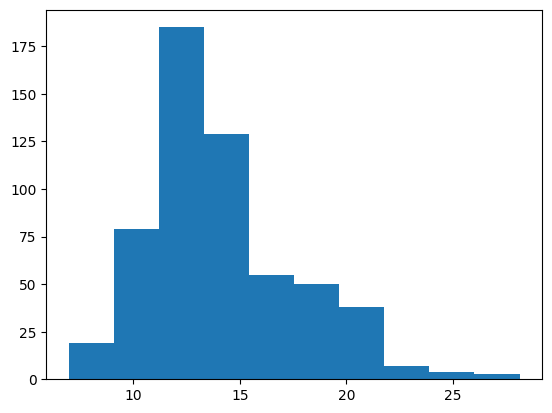

In [3]:
x_breast, y_breast=datasets.load_breast_cancer(return_X_y=True)
plt.hist(x_breast[:,0])

data should be standardized AFTER Train-Test splitting!

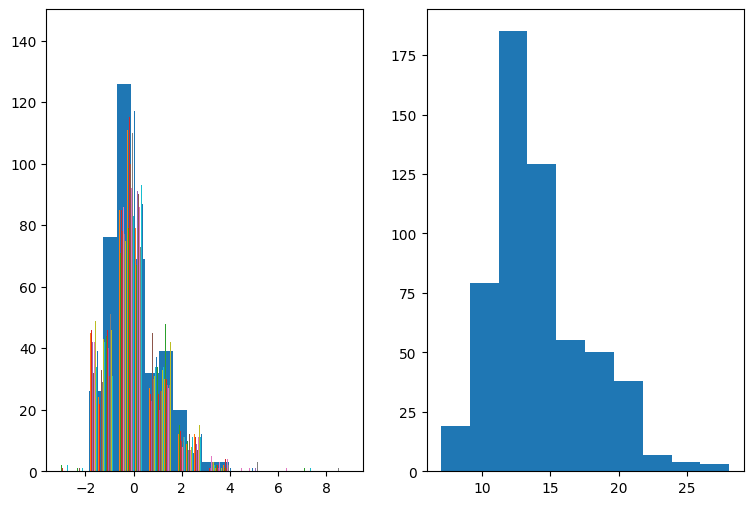

In [52]:
x_tr, x_te,y_tr, y_te= train_test_split(x_breast,y_breast,test_size=0.3, random_state=42)

#normalize the data
sc = StandardScaler()
x_tr=sc.fit_transform(x_tr)
x_te=sc.transform(x_te)

#plot histogram
figure=plt.figure(1, figsize=(9,6))
plt.subplot(1,2,1)
plt.hist(x_tr[:,0])
plt.hist(x_te)
plt.subplot(1,2,2)
plt.hist(x_breast[:,0])
plt.show()

In [51]:
model_kernel=svc(kernel='rbf',gamma=0.1,C=1,probability=True).fit(x_tr,y_tr)
model_kernell=svc(kernel='linear',gamma=0.5, C=0.1,probability=True).fit(x_tr,y_tr)
model_kn=knearest(n_neighbors=10).fit(x_tr,y_tr)


y_pred=model_kernel.predict(x_te)
y_predl=model_kernel.predict(x_te)
y_predn=model_kn.predict(x_te)

print(model_kernel.score(x_te,y_te), model_kernel.score(x_tr,y_tr))
print(model_kernell.score(x_te,y_te), model_kernell.score(x_tr,y_tr))
print(model_kn.score(x_te,y_te), model_kn.score(x_tr,y_tr))


0.9590643274853801 0.992462311557789
0.9824561403508771 0.9824120603015075
0.9707602339181286 0.9723618090452262


the most accurate model in the test phase is kernel linear model with 0.98 accuracy